In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

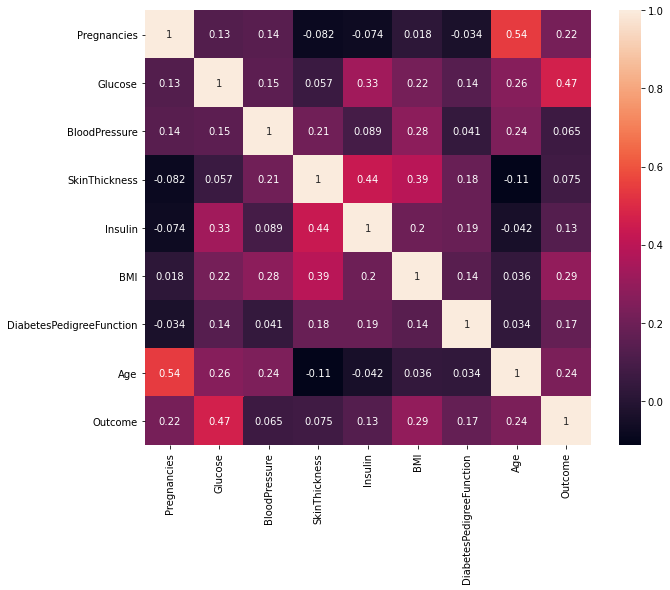

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True )

In [10]:
df= data.copy()

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [12]:
X = pd.DataFrame(sc.fit_transform(df.drop(["Outcome"], axis = 1)), columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [14]:
y= df['Outcome']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y , test_size=1/3, random_state=42)

In [86]:
clf = RandomForestClassifier(n_estimators=12, max_depth=3,max_features=3)

In [87]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=3, n_estimators=12)

In [88]:
clf.score(X_train,y_train)

0.79296875

In [89]:
clf.score(X_test,y_test)

0.7421875

In [90]:
from sklearn.metrics import confusion_matrix , classification_report

In [91]:
clf2 = clf.predict(X_test)

In [96]:
conf = confusion_matrix(y_test, clf2)
conf

array([[148,  22],
       [ 44,  42]], dtype=int64)

In [97]:
print(classification_report(y_test, clf2))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       170
           1       0.66      0.49      0.56        86

    accuracy                           0.74       256
   macro avg       0.71      0.68      0.69       256
weighted avg       0.73      0.74      0.73       256



In [99]:
#pip install mlxtend  

In [98]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

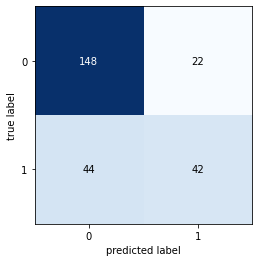

In [100]:
plot_confusion_matrix (conf)

In [102]:
clf

RandomForestClassifier(max_depth=3, max_features=3, n_estimators=12)

In [106]:
from sklearn.model_selection import GridSearchCV
parm_grid = {'max_depth': [3,4,5,6,7],
             'max_features': [3,5,4],
             'n_estimators': [12,90,45] }

In [107]:
parm_grid

{'max_depth': [3, 4, 5, 6, 7],
 'max_features': [3, 5, 4],
 'n_estimators': [12, 90, 45]}

In [108]:
clf = RandomForestClassifier()
grid = GridSearchCV(estimator=clf, param_grid=parm_grid , cv = 3 )
grid_result =grid.fit(X_train, y_train)


In [109]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.783179 using {'max_depth': 5, 'max_features': 4, 'n_estimators': 45}


In [116]:
model=grid_result.best_estimator_

In [117]:
model

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=45)

In [118]:
model_pre=model.predict(X_test)


In [119]:
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score

In [120]:
accuracy_score(y_test,model_pre)

0.76171875

In [124]:
print(classification_report(y_test, model_pre))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       170
           1       0.64      0.65      0.65        86

    accuracy                           0.76       256
   macro avg       0.73      0.73      0.73       256
weighted avg       0.76      0.76      0.76       256



In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [122]:
clfs = [
    {"Model":LogisticRegression(),"Parameters":{"penalty":['l1','l2'],'dual':[True,False],'solver':['newton-cg','lbfgs','liblinear', 'sag', 'saga']}},
    {"Model":KNeighborsClassifier(),"Parameters":{"n_neighbors":[2,4,8,6,5],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}}
]
"""
    {"Model":GaussianNB(),"Parameters":[]},
    {"Model":SVC(),"Parameters":[]},
    {"Model":DecisionTreeClassifier(),"Parameters":[]},
    {"Model":RandomForestClassifier(),"Parameters":[]}   
]
"""

'\n    {"Model":GaussianNB(),"Parameters":[]},\n    {"Model":SVC(),"Parameters":[]},\n    {"Model":DecisionTreeClassifier(),"Parameters":[]},\n    {"Model":RandomForestClassifier(),"Parameters":[]}   \n]\n'

In [125]:
for clf in clfs:
    #print(GridSearchCV(clf['Model'],clf['Parameters'],))
    clf =clf['Model']
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(clf)
    print("--------------------------------------")
    print(classification_report(y_test,y_pred))
    print("======================================")


LogisticRegression()
--------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       170
           1       0.60      0.62      0.61        86

    accuracy                           0.73       256
   macro avg       0.70      0.71      0.70       256
weighted avg       0.74      0.73      0.74       256

KNeighborsClassifier()
--------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       170
           1       0.54      0.50      0.52        86

    accuracy                           0.69       256
   macro avg       0.65      0.64      0.64       256
weighted avg       0.68      0.69      0.68       256



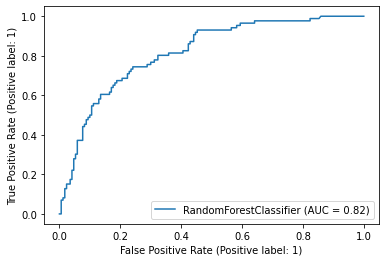

In [123]:
plot_roc_curve(model, X_test, y_test)